<a href="https://colab.research.google.com/github/galileo15640215/kikagaku/blob/master/kikagaku10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

畳み込みニューラルネットワークの精度向上
https://www.kikagaku.ai/tutorial/basic_of_computer_vision/learn/tensorflow_convolution_technic

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [0]:
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


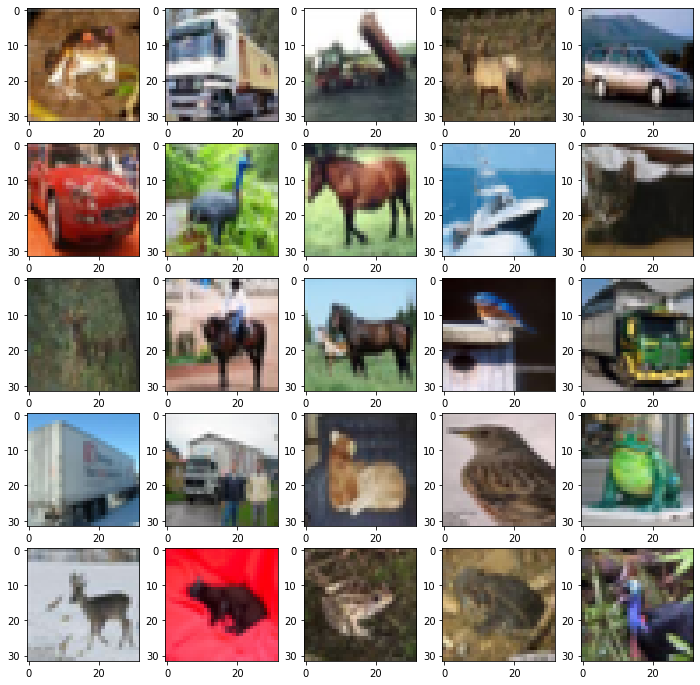

In [0]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])

In [0]:
# 正規化
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
x_train.shape, x_test.shape, t_train.shape, t_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [0]:
import os
import random

def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

In [0]:
     from tensorflow.keras import models, layers

In [0]:
# シードの固定
reset_seed(0)

# モデルの構築
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
]) 

# optimizerの設定
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

# モデルのコンパイル
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [0]:
# 学習の詳細設定
batch_size = 1024
epochs = 50

# 学習の実行
history = model.fit(x_train, t_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/50
49/49 [==============================] - 4s 91ms/step - loss: 1.9398 - accuracy: 0.2977 - val_loss: 1.6623 - val_accuracy: 0.4097
Epoch 2/50
49/49 [==============================] - 4s 74ms/step - loss: 1.5509 - accuracy: 0.4452 - val_loss: 1.4231 - val_accuracy: 0.4960
Epoch 3/50
49/49 [==============================] - 4s 74ms/step - loss: 1.3995 - accuracy: 0.5015 - val_loss: 1.3294 - val_accuracy: 0.5302
Epoch 4/50
49/49 [==============================] - 4s 73ms/step - loss: 1.2981 - accuracy: 0.5423 - val_loss: 1.2559 - val_accuracy: 0.5529
Epoch 5/50
49/49 [==============================] - 4s 73ms/step - loss: 1.2157 - accuracy: 0.5730 - val_loss: 1.1800 - val_accuracy: 0.5824
Epoch 6/50
49/49 [==============================] - 4s 73ms/step - loss: 1.1432 - accuracy: 0.6006 - val_loss: 1.1557 - val_accuracy: 0.5931
Epoch 7/50
49/49 [==============================] - 4s 73ms/step - loss: 1.0793 - accuracy: 0.6256 - val_loss: 1.1003 - val_accuracy: 0.6123
Epoch 8/50
49

In [0]:
results = pd.DataFrame(history.history)

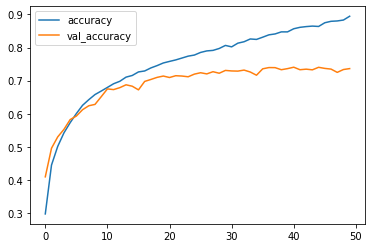

In [0]:
results[['accuracy', 'val_accuracy']].plot()

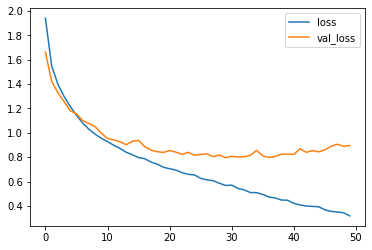

In [0]:
results[["loss", "val_loss"]].plot()

In [0]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
49,0.317682,0.89444,0.895608,0.7364


In [0]:
# シードの固定
reset_seed(0)

# モデルのインスタンス化
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# optimizerの設定
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

# モデルのコンパイル
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
# 学習の詳細設定
batch_size = 1024
epochs = 50

# 学習の実行
history = model.fit(x_train, t_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/50
49/49 [==============================] - 4s 80ms/step - loss: 1.9435 - accuracy: 0.2912 - val_loss: 1.6435 - val_accuracy: 0.4090
Epoch 2/50
49/49 [==============================] - 4s 75ms/step - loss: 1.5665 - accuracy: 0.4340 - val_loss: 1.4227 - val_accuracy: 0.4902
Epoch 3/50
49/49 [==============================] - 4s 75ms/step - loss: 1.4208 - accuracy: 0.4884 - val_loss: 1.3090 - val_accuracy: 0.5283
Epoch 4/50
49/49 [==============================] - 4s 74ms/step - loss: 1.3089 - accuracy: 0.5318 - val_loss: 1.2216 - val_accuracy: 0.5665
Epoch 5/50
49/49 [==============================] - 4s 74ms/step - loss: 1.2413 - accuracy: 0.5591 - val_loss: 1.1600 - val_accuracy: 0.5979
Epoch 6/50
49/49 [==============================] - 4s 74ms/step - loss: 1.1622 - accuracy: 0.5898 - val_loss: 1.0883 - val_accuracy: 0.6179
Epoch 7/50
49/49 [==============================] - 4s 74ms/step - loss: 1.1153 - accuracy: 0.6061 - val_loss: 1.0591 - val_accuracy: 0.6321
Epoch 8/50
49

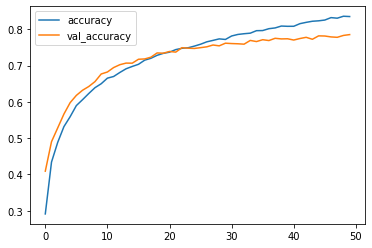

In [0]:
results = pd.DataFrame(history.history)
results[['accuracy', 'val_accuracy']].plot()

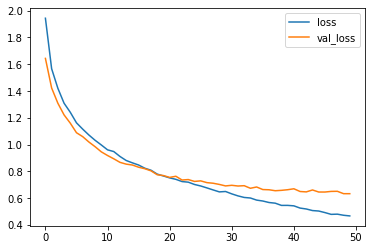

In [0]:
results[['loss', 'val_loss']].plot()

In [0]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
49,0.466816,0.83528,0.632827,0.7855


In [0]:
from tensorflow.keras import regularizers

In [0]:
# シードの固定
reset_seed(0)

# モデルのインスタンス化
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-2), input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-2)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-2)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# optimizerの設定
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

# モデルのコンパイル
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
# 学習の詳細設定
batch_size = 1024
epochs = 50

# 学習の実行
history = model.fit(x_train, t_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/50
49/49 [==============================] - 4s 78ms/step - loss: 2.6675 - accuracy: 0.2620 - val_loss: 2.1020 - val_accuracy: 0.3727
Epoch 2/50
49/49 [==============================] - 4s 74ms/step - loss: 1.9515 - accuracy: 0.4026 - val_loss: 1.8324 - val_accuracy: 0.4234
Epoch 3/50
49/49 [==============================] - 4s 73ms/step - loss: 1.7785 - accuracy: 0.4454 - val_loss: 1.7334 - val_accuracy: 0.4539
Epoch 4/50
49/49 [==============================] - 4s 72ms/step - loss: 1.7052 - accuracy: 0.4661 - val_loss: 1.6510 - val_accuracy: 0.4834
Epoch 5/50
49/49 [==============================] - 4s 73ms/step - loss: 1.6283 - accuracy: 0.4930 - val_loss: 1.6124 - val_accuracy: 0.4942
Epoch 6/50
49/49 [==============================] - 4s 73ms/step - loss: 1.5738 - accuracy: 0.5113 - val_loss: 1.5433 - val_accuracy: 0.5167
Epoch 7/50
49/49 [==============================] - 4s 73ms/step - loss: 1.5284 - accuracy: 0.5256 - val_loss: 1.5056 - val_accuracy: 0.5379
Epoch 8/50
49

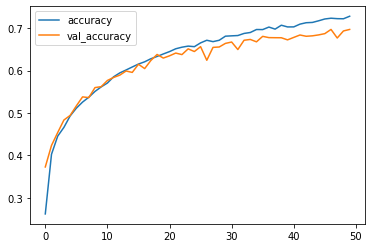

In [0]:
results = pd.DataFrame(history.history)
results[['accuracy', 'val_accuracy']].plot()

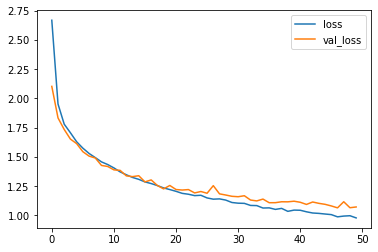

In [0]:
results[['loss', 'val_loss']].plot()

In [0]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
49,0.97713,0.728,1.070748,0.6969


In [0]:
# シードの固定
reset_seed(0)

# モデルのインスタンス化
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
    
# optimizerの設定
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

# モデルのコンパイル
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
# 学習の詳細設定
batch_size = 1024
epochs = 50

# Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 学習の実行
history = model.fit(x_train, t_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, t_test),
                    callbacks=[callback])

Epoch 1/50
49/49 [==============================] - 4s 77ms/step - loss: 1.9400 - accuracy: 0.2975 - val_loss: 1.6604 - val_accuracy: 0.4136
Epoch 2/50
49/49 [==============================] - 4s 73ms/step - loss: 1.5511 - accuracy: 0.4466 - val_loss: 1.4298 - val_accuracy: 0.4927
Epoch 3/50
49/49 [==============================] - 4s 73ms/step - loss: 1.3956 - accuracy: 0.5042 - val_loss: 1.3282 - val_accuracy: 0.5328
Epoch 4/50
49/49 [==============================] - 4s 73ms/step - loss: 1.3023 - accuracy: 0.5407 - val_loss: 1.2478 - val_accuracy: 0.5545
Epoch 5/50
49/49 [==============================] - 4s 73ms/step - loss: 1.2086 - accuracy: 0.5759 - val_loss: 1.1756 - val_accuracy: 0.5813
Epoch 6/50
49/49 [==============================] - 4s 73ms/step - loss: 1.1373 - accuracy: 0.6039 - val_loss: 1.1644 - val_accuracy: 0.5863
Epoch 7/50
49/49 [==============================] - 4s 73ms/step - loss: 1.0735 - accuracy: 0.6262 - val_loss: 1.1050 - val_accuracy: 0.6098
Epoch 8/50
49

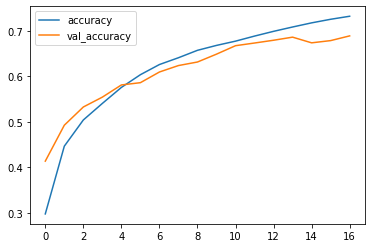

In [0]:
results = pd.DataFrame(history.history)
results[['accuracy', 'val_accuracy']].plot()

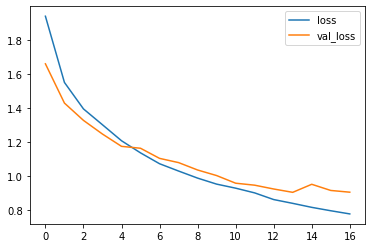

In [0]:
results[['loss', 'val_loss']].plot()

In [0]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
16,0.778694,0.73252,0.906295,0.6893


In [0]:
# シードの固定
reset_seed(0)

#モデルのインスタンス化
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# optimizerの設定
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

# モデルのコンパイル
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
# 学習の詳細設定
batch_size = 1024
epochs = 50

# 学習の実行
history = model.fit(x_train, t_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/50
49/49 [==============================] - 5s 100ms/step - loss: 1.6849 - accuracy: 0.4278 - val_loss: 3.8389 - val_accuracy: 0.1000
Epoch 2/50
49/49 [==============================] - 4s 86ms/step - loss: 1.1382 - accuracy: 0.5970 - val_loss: 6.1273 - val_accuracy: 0.1000
Epoch 3/50
49/49 [==============================] - 4s 86ms/step - loss: 0.9483 - accuracy: 0.6662 - val_loss: 5.1712 - val_accuracy: 0.1000
Epoch 4/50
49/49 [==============================] - 4s 86ms/step - loss: 0.8102 - accuracy: 0.7186 - val_loss: 3.7603 - val_accuracy: 0.1641
Epoch 5/50
49/49 [==============================] - 4s 86ms/step - loss: 0.6953 - accuracy: 0.7569 - val_loss: 3.2611 - val_accuracy: 0.2407
Epoch 6/50
49/49 [==============================] - 4s 87ms/step - loss: 0.5953 - accuracy: 0.7925 - val_loss: 2.7299 - val_accuracy: 0.2696
Epoch 7/50
49/49 [==============================] - 4s 86ms/step - loss: 0.5149 - accuracy: 0.8240 - val_loss: 2.6161 - val_accuracy: 0.2761
Epoch 8/50
4

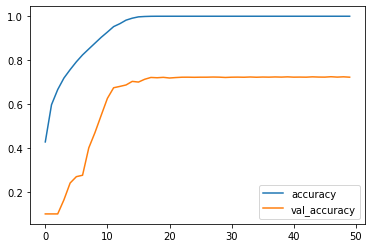

In [0]:
results = pd.DataFrame(history.history)
results[['accuracy', 'val_accuracy']].plot()

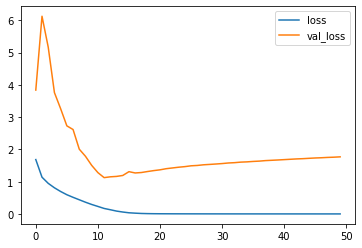

In [0]:
results[['loss', 'val_loss']].plot()

In [0]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
49,0.000503,1.0,1.769363,0.7225


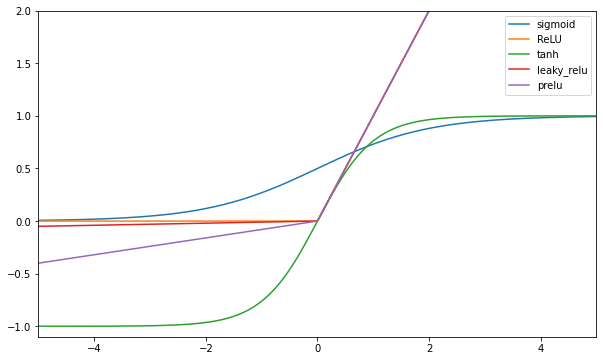

In [0]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def leaky_relu(x):
    return np.maximum(x, 0.01*x)

def prelu(x, a):
    return np.maximum(x, a*x)

fig = plt.figure(figsize=(10, 6))
x = np.linspace(-10, 10, 1000)

ax = fig.add_subplot(111)
ax.plot(x, sigmoid(x), label='sigmoid')
ax.plot(x, relu(x), label='ReLU')
ax.plot(x, tanh(x), label='tanh')
ax.plot(x, leaky_relu(x), label='leaky_relu')
ax.plot(x, prelu(x, 0.08), label='prelu')

plt.legend()
plt.xlim(-5, 5)
plt.ylim(-1.1, 2)
plt.grid(color='white', linestyle='-')
plt.show();